In [2]:
import pandas as pd
from io import StringIO
import requests

url = "https://planet4589.org/space/stats/out/csatht.f.txt"
raw = requests.get(url).text

# 주석(#) 제거
lines = [ln for ln in raw.splitlines() if ln.strip() and not ln.startswith("#")]

# DataFrame 변환
df = pd.read_csv(StringIO("\n".join(lines)), delim_whitespace=True, header=None)

df.columns = [
    "Bin","Value_km","ValMin_km","ValMax_km",
    "ACM","ACN","Star","StarD","PL","PX",
    "RB","Part","DebASAT","DebColl","Deb","Err","Total"
]

# 저장
df.to_csv("csatht_f.csv", index=False)
#df.to_excel("csatht_f.xlsx", index=False)

print(df.head())


   Bin  Value_km ValMin_km ValMax_km  ACM  ACN  Star  StarD  PL  PX  RB  Part  \
0    0  202.5000  200.0000  205.0000    0    1     0      0   0   0   0     0   
1    1  207.5000  205.0000  210.0000    0    0     0      0   0   0   0     0   
2    2  212.5000  210.0000  215.0000    0    0     0      0   0   0   0     0   
3    3  217.5000  215.0000  220.0000    0    0     0      0   0   0   0     0   
4    4  222.5000  220.0000  225.0000    0    2     1      0   0   0   0     0   

   DebASAT  DebColl  Deb  Err  Total  
0        0        0    0    0      1  
1        0        0    0    0      0  
2        0        0    0    0      0  
3        0        0    0    0      0  
4        0        0    0    0      3  


/tmp/ipykernel_129508/839841803.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO("\n".join(lines)), delim_whitespace=True, header=None)


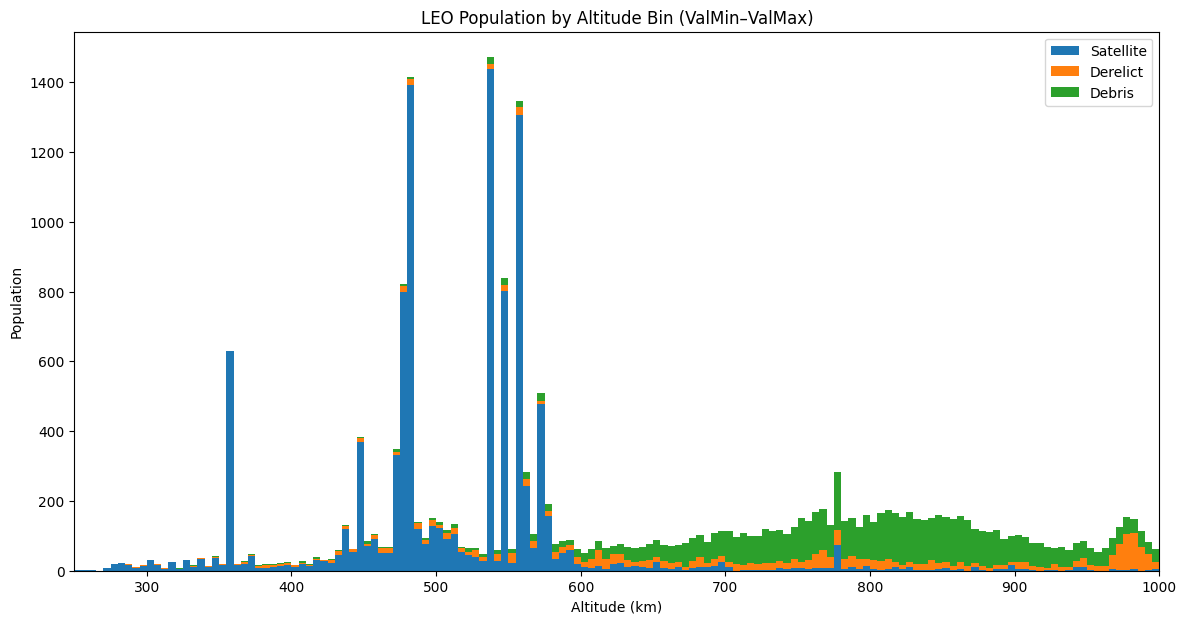

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

numeric_cols = [
    "Bin","Value_km","ValMin_km","ValMax_km",
    "ACM","ACN","Star","StarD","PL","PX",
    "RB","Part","DebASAT","DebColl","Deb","Err","Total"
]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# species별 집계
df["Satellite"] = df["ACM"] + df["ACN"] + df["Star"]
df["Derelict"] = df["StarD"] + df["PL"] + df["PX"] + df["RB"] + df["Part"]
df["Debris"] = df["DebASAT"] + df["DebColl"] + df["Deb"]

# Altitude 구간 (ValMin–ValMax) 기반 막대 그래프
fig, ax = plt.subplots(figsize=(14,7))

ax.bar(df["ValMin_km"], df["Satellite"], width=df["ValMax_km"]-df["ValMin_km"], 
       label="Satellite", align="edge")
ax.bar(df["ValMin_km"], df["Derelict"], width=df["ValMax_km"]-df["ValMin_km"], 
       bottom=df["Satellite"], label="Derelict", align="edge")
ax.bar(df["ValMin_km"], df["Debris"], width=df["ValMax_km"]-df["ValMin_km"], 
       bottom=df["Satellite"]+df["Derelict"], label="Debris", align="edge")

ax.set_xlabel("Altitude (km)")
ax.set_ylabel("Population")
ax.set_title("LEO Population by Altitude Bin (ValMin–ValMax)")
ax.legend()
ax.set_xlim(250, 1000)

plt.show()
